## EECS 491 Assignment 2

### Q1. Conditional Independence (10 pts)

Consider the following bayes net:

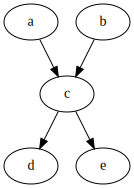

In [1]:
from graphviz import Digraph

q1 = Digraph()
q1.node('a') # variable name, label
q1.node('b')
q1.node('c')
q1.node('d')
q1.node('e')
q1.edges(['ac', 'bc', 'cd', 'ce'])
# render inline
q1

1.1. (5 pts) Show that $a$ is independent of $b$ given no other information, i.e.
$$
a \perp b\, |\, \varnothing
$$

If this is true, then
$$p(a,b) = p(a)p(b)$$
We ignore $d$ and $e$, since $a$ and $b$ have no direct connections to them. Marginalizing over $c$, we get
$$p(a,b) = \sum_{c}p(a,b,c)$$
$$p(a,b) = \sum_{c}p(c|a,b)p(a)p(b)$$
$$p(a,b) = p(a)p(b)\sum_{c}p(c|a,b)$$
$$p(a,b) = p(a)p(b)$$

1.2. (5 pts) Prove or disprove the following using basic probability (i.e. not using d-separation)
$$
a \perp b\, |\, e
$$

For this to be true, we want to show that
$$p(a,b|e) = p(a|e)p(b|e)$$
Ignoring $d$, we rewrite as shown
$$p(a,b|e) = \frac{1}{p(e)}\sum_{c}p(a,b,c,e)$$
$$p(a,b|e) = \frac{1}{p(e)}\sum_{c}p(c|a,b)p(e|c)p(a)p(b)$$
$$p(a,b|e) = \frac{p(a)p(b)}{p(e)}\sum_{c}p(c|a,b)p(e|c)$$
$$p(a,b|e) = p(a)p(b)\sum_{c}p(c|a,b)$$
There is no way to rewrite this expression such that
$$p(a,b|e) = p(a|e)p(b|e)$$

### Q2. Conditional Independence and Causality (5 pts)

Consider the following model

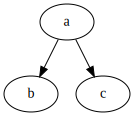

In [2]:
q2 = Digraph()
q2.node('a') # variable name, label
q2.node('b')
q2.node('c')
q2.edges(['ac', 'ab'])
# render inline
q2

Show that this causal relationship suggested by the arrows does not necessarily hold, because the identical distribution can be represented by a model defined by different conditional distributions.  What conditional independence assumption does this model make?

The joint probability of this model is
$$p(a,b,c) = p(b|a)p(c|a)p(a).$$
Using Bayes' rule, we can rewrite $p(b|a)$ as
$$p(b|a) = \frac{p(a|b)p(b)}{p(a)},$$
so
$$p(a,b,c) = p(b|a)p(c|a)p(a)$$

$$p(a,b,c) = \frac{p(a|b)p(b)}{p(a)}p(c|a)p(a)$$

$$p(a,b,c) = p(a|b)p(c|a)p(b),$$
which can be represented as the following model:

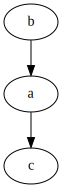

In [3]:
q2a = Digraph()
q2a.node('a') # variable name, label
q2a.node('b')
q2a.node('c')
q2a.edges(['ac', 'ba'])
# render inline
q2a

However, we can see that
$$b \perp c | a$$
because
$$p(b,c|a) = \frac{p(a,b,c)}{p(a)}$$

$$p(b,c|a) = \frac{p(b|a)p(c|a)p(a)}{p(a)}$$

$$p(b,c|a) = p(b|a)p(c|a)$$

### Q3. Model Complexity, Free Parameters, and Simplifying Assumptions (20 pts)

3.1. (5 pts) Consider a *general* joint probability distribution with $N$ variables $x_1 \ldots x_N$ each of which can have $K$ values. What is the expression for the joint distribution in terms of conditional probabilities?

$$p(x_1,x_2,x_3,...,x_{N-1},x_N) = p(x_1|x_2,x_3,...,x_{N-1},x_N)p(x_2|x_3,...,x_{N-1},x_N)p(x_3|...,x_{N-1},x_N)...p(x_{N-1}|x_N)p(x_N)$$

3.2. (5 pts) What is the total number of free-paramters requried to specify this model?  (Note: the term "free parameter" means a parameter that is unconstrained.  For example a Beroulli distribution to describe a coin flip has one free parameter $\theta$ to describe, say, the probability of heads; the probability of tails must be $1-\theta$, because the probability is constrained to sum to one.) Provide both the exact expression and a simpler one in "big-O" notation.

For the first term, one needs to specify $(K-1)K^{N-1}$ values. Continuing this into a series, there are
$$K^N-1$$
free parameters, or
$$O(K^N)$$

3.3. (5 pts) Now suppose that the complexity of the model is constrained, so that each variable depends on (at most) $m$ other variables and is conditionally independent of the rest, i.e. a Bayes net.  Each node has $m$ parents and there are $m$ root nodes.  How many parameters are required to define this model?

$$NK^m(K-1)$$

3.4. (5 pts) Let us make one more simplifying assumption, which is that in addition to depending on only $m$ variables, the conditional probability is described by a noisy-OR function (K=2, see Q3).  What is the expression for the number of parameters in this case?

$$mN$$

### Q4. Models of Conditional Probability (20 pts)

In Bayesian networks (or directed acyclic graphical models), the joint probability distribution is factored into the product of conditional probability distributions

$$
p(x) = \prod_{i=1}^N p(x_i|\textrm{pa}(x_i))
$$

As we used the previous problem, a simplifying assumption for the conditional probability is noisy-OR model

$$
p(x_i | \textrm{pa}({x_i})) = 1 - (1 - \mu_{i0}) \prod_{\normalsize j \in \textrm{pa}(x_i)}(1 - \mu_{ij})^{x_j}
$$

where $j$ is an index over the parents of $x_i$.  Note that the exponent $x_j$ is either 0 or 1 so the term is either 1 or $1-\mu_{ij}$ depending on the state of the parent $x_j$.

4.1 (5 pts) Show that the noisy-OR function can be interpreted as a "soft" (i.e. probabilistic) form of the logical OR function, i.e. the function gives $x_i = 1$ whenever at least one of the parents is 1.

Consider the following model using noisy-OR:

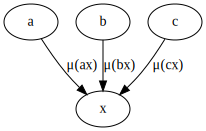

In [4]:
q4 = Digraph()
q4.node('a')
q4.node('b')
q4.node('c')
q4.node('x')
q4.edge('a','x',label=' \u03BC(ax)')
q4.edge('b','x',label=' \u03BC(bx)')
q4.edge('c','x',label=' \u03BC(cx)')

q4

In this model, the probability of $x=1$ is given as
$$p(x=1|a,b,c,...) = 1 - (1 - \mu_{ax})(1 - \mu_{bx})(1 - \mu_{cx})...$$
If all $\mu_{ix}$ are zero, then
$$(1 - \mu_{ix}) = 1$$
$$p(x=1|a,b,c,...) = 1 - (1)(1)(1)... = 0.$$
However, if any $\mu_{ix}$ is one, then
$$(1 - \mu_{ix}) = 0$$
$$p(x=1|a,b,c,...) = 1 - (0)(1)(1)... = 1.$$

4.2 (5 pts) What is the interpretation of $\mu_{i0}$? Provide a clear explanation.

$\mu_{i0}$ is the "noise" on all of the probabilities. This accounts for a general uncertainty in the individual probabilities, since the methods used to obtain them may vary.

Another choice for the conditional probability is a sigmoid function

$$
p(x_i | \textrm{pa}({x_i})) = \sigma
\left(
w_{i0} + \sum_{\normalsize j \in \textrm{pa}(x_i)} w_{ij} x_j
\right)\,, \quad \textrm{where} \;
\sigma(a) = \frac{1}{1+e^{-a}}
$$

where $\sigma (a)$ is the logistic sigmoid function.

4.3 (5 pts) Contrast the noisy-OR function and the sigmoid mathematically.  Is one more general than the other?  Can each compute unique functions?

The noisy-OR function can be expressed as a combination of probabilities, whereas the sigmoid can be expressed as a *weighted* combination of probabilites. This means that the sigmoid is more general than the noisy-OR, as if the weights are all equal then it will behave similar to the noisy-OR, however it can compute more unique functions. Particularly a sigmoid can have some terms with positive weights and others with negative, so that some terms increase the overall probability and others decrease it.

4.4 (5 pts) Think of two examples, one for the noisy-OR and one for the sigmoid, that contrast the way these functions model the conditional dependencies.  Explain how each is appropriately modeled by one function but not the other.

A fitting example for the noisy-OR is a medical diagnosis system, with multiple diseases and symptoms. The diseases are independent of each other, but can potentially share the same symptoms. If any disease that strongly causes that symptom is expressed, then the symptom will also be expressed. The noisy-OR handles this because the liklihoods are multiplicative, so diseases with stronger liklihoods bias the final probability without being affected by any other diseases. This isn't a good use for the sigmoid, as the weights can just be represented as probabilities, and the noisy-OR is much easier to compute.

A different case is the liklihood of a person developing a certain condition, for example heart disease. There are numerous factors that increase the liklihood of a person developing heart disease, such as a poor diet and a family history of the disease. However there are also factors that decrease the liklihood, such as physical activity and exercise. This is adequately modeled using a sigmoidal function, because the increase and decrease in liklihood can be accounted for using the weights. A noisy-OR won't work here, because if any one of the unhealthy factors is present then the healthy factors won't have any effect.

### Q5. Car Troubles (25 pts)

(Adpted from Barber Exercise 3.6) Your friend has car trouble.  The probability of the car starting is described by the model below, with the probabilities givien in Barber 3.6.

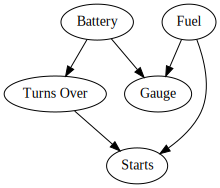

In [5]:
q5 = Digraph()
q5.node('b', 'Battery')
q5.node('g', 'Gauge')
q5.node('f', 'Fuel')
q5.node('t', 'Turns Over')
q5.node('s', 'Starts')
q5.edges(['bg','fg','bt','ts','fs'])
q5

5.1 (10 pts) Calculate the $p(f=\textsf{empty} | s=\textsf{no})$, the probability of the fuel tank being empty given that the car does not start.  Do this "by hand", i.e in manner similar to the **Inference** section in Barber 3.1.1.  Use the probabilities given in the exercise.  Show your work.

Probabilities from the exercise:

| Expression &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; | Value | Expression &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; | Value |
| :-------------- | :--- | :-------------- | :--- |
| $p(b=0)$ | 0.02 | $p(f=0)$ | 0.05 |
| $p(g=0|b=1,f=1)$ | 0.04 | $p(g=0|b=1,f=0)$ | 0.97 |
| $p(g=0|b=0,f=1)$ | 0.1 | $p(g=0|b=0,f=0$ | 0.99 |
| $p(t=0|b=1)$ | 0.03 | $p(t=0|b=0)$ | 0.98 |
| $p(s=0|t=1,f=1)$ | 0.01 | $p(s=0|t=1,f=0$ | 0.92 |
| $p(s=0|t=0,f=1)$ | 1 | $p(s=0|t=0,f=0$ | 0.99 |

$$p(f=0|s=0) = \frac{p(f=0,s=0)}{p(s=0)}$$

$$p(f=0|s=0) = \frac{\sum_{b,g,t}p(b,f=0,g,t,s=0)}{\sum_{b,f,g,t}p(b,f,g,t,s=0)}$$

$$p(f=0|s=0) = \frac{\sum_{b,g,t}p(g|b,f=0)p(t|b)p(s=0|f=0,t)p(b)p(f=0)}{\sum_{b,f,g,t}p(g|b,f)p(t|b)p(s=0|f,t)p(b)p(f)}$$

$$p(f=0|s=0) = \frac{0.99x0.98x0.99x0.02x0.05 + 0.99x0.02x0.92x0.02x0.05 + 0.01x0.98x0.99x0.02x0.05 + 0.01x0.02x0.92x0.02x0.05 + 0.97x0.03x0.99x0.98x0.05 + 0.97x0.97x0.92x0.98x0.05 + 0.03x0.03x0.99x0.98x0.05 + 0.03x0.97x0.92x0.98x0.05}{0.99x0.98x0.99x0.02x0.05 + 0.99x0.02x0.92x0.02x0.05 + 0.01x0.98x0.99x0.02x0.05 + 0.01x0.02x0.92x0.02x0.05 + 0.97x0.03x0.99x0.98x0.05 + 0.97x0.97x0.92x0.98x0.05 + 0.03x0.03x0.99x0.98x0.05 + 0.03x0.97x0.92x0.98x0.05 + 0.1x0.98x1x0.02x0.95 + 0.1x0.02x0.01x0.02x0.95 + 0.9x0.98x1x0.02x0.95 + 0.9x0.02x0.01x0.02x0.95 + 0.04x0.03x1x0.98x0.95 + 0.04x0.97x0.01x0.98x0.95 + 0.96x0.03x1x0.98x0.95 + 0.96x0.97x0.01x0.98x0.95}$$

$$p(f=0|s=0) = \frac{0.0462}{0.1018}$$

$$p(f=0|s=0) = 0.4537$$

5.2 (5 pts) Implement this network using a toolbox for probabilistic models (e.g. `pgmpy` or `BayesNets.jl`). Use this to verify that your derivation and calculations are correct for the previous problem.

In [6]:
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination

In [7]:
# Create model from list of edges
model = BayesianModel([('B','G'),('F','G'),('B','T'),('T','S'),('F','S')])

# define p(B) and p(M) 
# variable_card is cardinality = 2 for true|false
# values are defined in numeric order p(x_i = [false, true]), ie  [0, 1]
priorB = TabularCPD(variable='B', variable_card=2, values=[[0.02, 0.98]])
priorF = TabularCPD(variable='F', variable_card=2, values=[[0.05, 0.95]])

# define p(G|B,F)
# Variables cycle in numerical order of evidence values,
# ie BF = 00, 01, 10, 11 for each value of G.
cpdG = TabularCPD(variable='G', variable_card=2, 
                  evidence=['B', 'F'], evidence_card=[2, 2],
                  values=[[0.99, 0.1, 0.97, 0.04], 
                          [0.01, 0.9, 0.03, 0.96]])

# define p(T|B)
cpdT = TabularCPD(variable='T', variable_card=2,
                 evidence=['B'], evidence_card=[2],
                 values=[[0.98, 0.03],
                         [0.02, 0.97]])

# define p(S|T,F)
cpdS = TabularCPD(variable='S', variable_card=2, 
                  evidence=['T', 'F'], evidence_card=[2, 2],
                  values=[[0.99, 1.0, 0.92, 0.01], 
                          [0.01, 0.0, 0.08, 0.99]])

# add probabilities to model
model.add_cpds(priorB, priorF, cpdG, cpdT, cpdS)
model.check_model()

True

In [8]:
inference = VariableElimination(model)
print(inference.query(['F'], evidence={'S' : 0}))

Eliminating: B: 100%|██████████| 3/3 [00:00<00:00, 764.04it/s]

+------+----------+
| F    |   phi(F) |
+======+==========+
| F(0) |   0.4537 |
+------+----------+
| F(1) |   0.5463 |
+------+----------+


Using my `pgmpy` model, I can see that my calculated probability is correct,
$$p(f=0|s=0) = 45.37\%$$

5.3 (10 pts) Suppose you have loaned this car to a friend. They call call you and announce, "the car won't start".  Illustrate your diagnostic and inference process by using the model to show how your beliefs change as you ask questions.  Your friend can only tell you the states of $t$ and $g$ (and you already know $s$).  Use two different scenarios, i.e. two different reasons why the car won't start.  For each scenario, your answer should discuss your choice of each question you pose to the network, and how it allows you to uncover the true cause the problem.

#### Scenario 1: Out of Gas

Our friend calls, saying that the car won't start. If we naively use the inference engine without asking any questions, we will get the following results:

In [9]:
print('p(f|s=0)')
print(inference.query(['F'], evidence={'S': 0}))
print('p(b|s=0)')
print(inference.query(['B'], evidence={'S': 0}))

Eliminating: F: 100%|██████████| 3/3 [00:00<00:00, 711.34it/s]

p(f|s=0)
+------+----------+
| F    |   phi(F) |
+======+==========+
| F(0) |   0.4537 |
+------+----------+
| F(1) |   0.5463 |
+------+----------+
p(b|s=0)
+------+----------+
| B    |   phi(B) |
+======+==========+
| B(0) |   0.1927 |
+------+----------+
| B(1) |   0.8073 |
+------+----------+


From these initial results, we see that it is more likely (45% vs 19%) that the car is out of gas. So we ask our friend to check the reading on the gauge, and they report that when they turn the key that the gauge reads empty. If we add this information into our inference engine, we see that it is extremely likely (93%) that the car is indeed out of gas.

In [10]:
print('p(f|s=0,g=0)')
print(inference.query(['F'], evidence={'S': 0, 'G': 0}))
print('p(b|s=0,g=0)')
print(inference.query(['B'], evidence={'S': 0, 'G': 0}))

Eliminating: F: 100%|██████████| 2/2 [00:00<00:00, 700.69it/s]

p(f|s=0,g=0)
+------+----------+
| F    |   phi(F) |
+======+==========+
| F(0) |   0.9306 |
+------+----------+
| F(1) |   0.0694 |
+------+----------+
p(b|s=0,g=0)
+------+----------+
| B    |   phi(B) |
+======+==========+
| B(0) |   0.0590 |
+------+----------+
| B(1) |   0.9410 |
+------+----------+


#### Scenario 2: Dead Battery
Our friend calls, saying that the car won't start. Using our prior experience we're slightly more likely to be out of gas than to have a dead battery, so we ask our friend to check the reading on the gauge. Our friend then tells us that the gauge is still working. Using this information, we still aren't certain about what is the cause of our problem.

In [11]:
print('p(f|s=0,g=1)')
print(inference.query(['F'], evidence={'S': 0, 'G': 1}))
print('p(b|s=0,g=1)')
print(inference.query(['B'], evidence={'S': 0, 'G': 1}))

Eliminating: F: 100%|██████████| 2/2 [00:00<00:00, 473.53it/s]

p(f|s=0,g=1)
+------+----------+
| F    |   phi(F) |
+======+==========+
| F(0) |   0.0255 |
+------+----------+
| F(1) |   0.9745 |
+------+----------+
p(b|s=0,g=1)
+------+----------+
| B    |   phi(B) |
+======+==========+
| B(0) |   0.3128 |
+------+----------+
| B(1) |   0.6872 |
+------+----------+


While it is now extremely unlikely that we're out of gas (2.5%), we still do not have much information about the state of the battery (31%). We ask our friend if the car turns over, and they inform us that it does not. Using our inference engine, we see that given this information that while the liklihood that it is the battery hasn't increased much (38% vs 31%). However the liklihood that we are out of gas is an order of magnitude lower than it was (0.12% vs 2.5%), so we can be fairly certain that the battery is dead.

In [12]:
print('p(f|s=0,t=0,g=0)')
print(inference.query(['F'], evidence={'S': 0, 'T': 0, 'G': 1}))
print('p(b|s=0,t=0,g=0)')
print(inference.query(['B'], evidence={'S': 0, 'T': 0, 'G': 1}))

p(f|s=0,t=0,g=0)


Eliminating: F: 100%|██████████| 1/1 [00:00<00:00, 728.30it/s]

+------+----------+
| F    |   phi(F) |
+======+==========+
| F(0) |   0.0012 |
+------+----------+
| F(1) |   0.9988 |
+------+----------+
p(b|s=0,t=0,g=0)
+------+----------+
| B    |   phi(B) |
+======+==========+
| B(0) |   0.3844 |
+------+----------+
| B(1) |   0.6156 |
+------+----------+


For both of these scenarios, we initially assumed that the gas was empty, so we asked our friend to look at the gauge. However the gauge is affected by both the gas and the battery, so our liklihoods aren't super strong from that information. This led to having to ask a followup question to diagnose the dead battery. If we instead start by asking about whether the car turns over, we see that if it turns over we can guarantee that the battery isn't dead with high certainty (99%), and that it is probably the gas (83%). If the car doesn't turn over, our liklihoods aren't super certain, but it is almost 10x more likely to be the battery than the gas (40% vs 5%).

In [13]:
print('p(f|s=0,t=0)')
print(inference.query(['F'], evidence={'S': 0, 'T': 0}))
print('p(b|s=0,t=0)')
print(inference.query(['B'], evidence={'S': 0, 'T': 0}))
print('p(f|s=0,t=1)')
print(inference.query(['F'], evidence={'S': 0, 'T': 1}))
print('p(b|s=0,t=1)')
print(inference.query(['B'], evidence={'S': 0, 'T': 1}))

  0%|          | 0/2 [00:00<?, ?it/s]

p(f|s=0,t=0)
+------+----------+
| F    |   phi(F) |
+======+==========+
| F(0) |   0.0495 |
+------+----------+
| F(1) |   0.9505 |
+------+----------+
p(b|s=0,t=0)
+------+----------+
| B    |   phi(B) |
+======+==========+
| B(0) |   0.4000 |
+------+----------+
| B(1) |   0.6000 |
+------+----------+
p(f|s=0,t=1)


Eliminating: G:   0%|          | 0/2 [00:00<?, ?it/s]

+------+----------+
| F    |   phi(F) |
+======+==========+
| F(0) |   0.8288 |
+------+----------+
| F(1) |   0.1712 |
+------+----------+
p(b|s=0,t=1)


Eliminating: F: 100%|██████████| 2/2 [00:00<00:00, 667.25it/s]


+------+----------+
| B    |   phi(B) |
+======+==========+
| B(0) |   0.0004 |
+------+----------+
| B(1) |   0.9996 |
+------+----------+


### Exploration: Medical Diagnosis (20 pts)

I chose to implement a belief network for the purpose of medical diagnosis. All of the nodes represent either lifestyle factors, diseases or symptoms, and the joint probability can be written (using abbreviations for brevity) as
$$p(a,b,c,d,e,f,g,h,i,j,k,m,n,o,p,q,r,s,t,u,v,w,x,y,z,1,2,3,4,5,6),$$
with a visual representation displayed below.

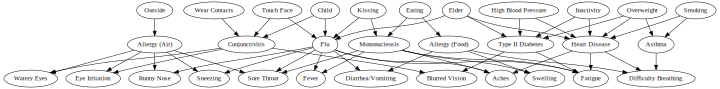

In [14]:
q6 = Digraph()
q6.attr(size='10,15')
q6.node('a','Elder')
q6.node('b','Child')
q6.node('c','Outside')
q6.node('d','Eating')
q6.node('e','Touch Face')
q6.node('f','Wear Contacts')
q6.node('g','Kissing')
q6.node('h','Overweight')
q6.node('i','Smoking')
q6.node('j','High Blood Pressure')
q6.node('k','Inactivity')
q6.node('m','Flu')
q6.node('n','Allergy (Air)')
q6.node('o','Allergy (Food)')
q6.node('p','Conjunctivitis')
q6.node('q','Mononucleosis')
q6.node('r','Asthma')
q6.node('s','Type II Diabetes')
q6.node('t','Heart Disease')
q6.node('u','Fever')
q6.node('v','Sore Throat')
q6.node('w','Runny Nose')
q6.node('x','Aches')
q6.node('y','Fatigue')
q6.node('z','Eye Irritation')
q6.node('1','Watery Eyes')
q6.node('2','Sneezing')
q6.node('3','Diarrhea/Vomiting')
q6.node('4','Swelling')
q6.node('5','Difficulty Breathing')
q6.node('6','Blurred Vision')
q6.edges(['am','as','at','bm','bp','cn','do','dq','em','ep','fp','gm','gq','hr','hs','ht','ir','it','js',
          'jt','ks','kt',
          'mu','mv','mw','mx','my','m3','m2','nz','nw','n1','n2','nv','o3','o4','o5','pz','p1','p6','qy','q4','qv',
          'qu','qx','r5','sy','s6','tx','ty','t5'])
q6

A three-layer structure was chosen to implement the desired simplified causality. The first layer contains common lifestyle factors, such as someone's age and whether they smoke or not. The second layer contains common ailments, ranging from allergies and the flu to mononucleosis (mono) and type II diabetes. The third layer contains common symptoms between all of these ailments, such as sneezing and fatigue. Any symptoms which were unique to any disease (such as frequent urination with diabetes) were left out for simplicity.

With this representation, there are a large amount of parameters to specify (151) with very little available data to support every value. Because of this, I chose to parameterize this belief network using the noisy-OR model (see Question 4). This choice reduced the number of parameters to 80, almost a 50% reduction. Of course this is a simplification, as many of the nodes are not independent in the real world (having diabetes increases your liklihood for heart disease, as an example).

The network is implemented using pgmpy, and is constructed below. pgmpy does not currently support inference in noisy-OR models, so a bayesian model with fully specified CPDs using the noisy-OR methodology is presented instead. Most data is compiled from the CDC, Mayo Clinic and Cleveland Clinic websites for the liklihoods of ailments given risk factors, and all other values are selected via educated approximation.

In [15]:
# Create model from list of edges
diag = BayesianModel([('a','m'),('a','s'),('a','t'),('b','m'),('b','p'),('c','n'),('d','o'),
                       ('d','q'),('e','m'),('e','p'),('f','p'),('g','m'),('g','q'),('h','r'),('h','s'),
                       ('i','r'),('i','t'),('j','s'),('j','t'),('k','s'),('k','t'),
                       ('m','u'),('m','v'),('m','w'),('m','x'),('m','y'),('m','3'),('m','2'),('n','z'),('n','w'),
                       ('n','1'),('n','2'),('o','3'),('o','4'),('o','5'),('p','z'),('p','1'),('p','6'),
                       ('q','y'),('q','4'),('q','v'),('q','u'),('q','x'),('r','5'),('s','y'),('s','6'),('t','x'),
                       ('t','y'),('t','5')])

# define priors for lifestyle factors
priorElder = TabularCPD(variable='a', variable_card=2, values=[[0.86,0.14]])
priorChild = TabularCPD(variable='b', variable_card=2, values=[[0.77,0.23]])
priorOutside = TabularCPD(variable='c', variable_card=2, values=[[0.10,0.90]])
priorEating = TabularCPD(variable='d', variable_card=2, values=[[0.05,0.95]])
priorTouchFace = TabularCPD(variable='e', variable_card=2, values=[[0.25,0.75]])
priorWearContacts = TabularCPD(variable='f', variable_card=2, values=[[0.86,0.14]])
priorKissing = TabularCPD(variable='g', variable_card=2, values=[[0.25,0.75]])
priorOverweight = TabularCPD(variable='h', variable_card=2, values=[[0.28,0.72]])
priorSmoking = TabularCPD(variable='i', variable_card=2, values=[[0.86,0.14]])
priorHighBloodPressure = TabularCPD(variable='j', variable_card=2, values=[[0.76,0.24]])
priorInactivity = TabularCPD(variable='k', variable_card=2, values=[[0.72,0.28]])

diag.add_cpds(priorElder,priorChild,priorOutside,priorEating,priorTouchFace,priorWearContacts,priorKissing,
             priorOverweight,priorSmoking,priorHighBloodPressure,priorInactivity)

In [16]:
# define CPDs for diseases given lifestyle factors

# define p(flu|elder,child,face touch,kissing)
# Variables cycle in numerical order of evidence values,
# abeg = 0000, 0001, 0010, 0011, 0100, 0101, 0110, 0111, 1000, 1001, 1010, 1011, 1100, 1101, 1110, 1111
cpdm = TabularCPD(variable='m', variable_card=2, 
                  evidence=['a','b','e','g'], evidence_card=[2,2,2,2],
                  values=[[0.95, 0.93, 0.93, 0.86, 0.93, 0.86, 0.86, 0.8, 0.93, 0.86, 0.86, 0.8, 1.0, 1.0, 1.0, 1.0], 
                          [0.05, 0.07, 0.07, 0.14, 0.07, 0.14, 0.14, 0.2, 0.07, 0.14, 0.14, 0.2, 0.0, 0.0, 0.0, 0.0]])

# define p(air allergy|outside)
# c = 0, 1
cpdn = TabularCPD(variable='n', variable_card=2,
                 evidence=['c'], evidence_card=[2],
                 values=[[0.99, 0.93],
                         [0.01, 0.07]])

# define p(food allergy|eating)
# d = 0, 1
cpdo = TabularCPD(variable='o', variable_card=2,
                 evidence=['d'], evidence_card=[2],
                 values=[[1.0, 0.99],
                         [0.0, 0.01]])

# define p(conjunctivitis|child,touch face,wear contacts)
# bef = 000, 001, 010, 011, 100, 101, 110, 111
cpdp = TabularCPD(variable='p', variable_card=2, 
                  evidence=['b','e','f'], evidence_card=[2,2,2],
                  values=[[0.99, 0.9, 0.98, 0.88, 0.98, 0.88, 0.96, 0.86], 
                          [0.01, 0.1, 0.02, 0.12, 0.02, 0.12, 0.04, 0.14]])

# define p(mono|eating,kissing)
# dg = 00, 01, 10, 11
cpdq = TabularCPD(variable='q', variable_card=2, 
                  evidence=['d', 'g'], evidence_card=[2, 2],
                  values=[[1.0, 0.99, 0.999, 0.989], 
                          [0.0, 0.01, 0.001, 0.011]])

# define p(asthma|overweight,smoking)
# hi = 00, 01, 10, 11
cpdr = TabularCPD(variable='r', variable_card=2, 
                  evidence=['h', 'i'], evidence_card=[2, 2],
                  values=[[0.93, 0.88, 0.89, 0.78], 
                          [0.07, 0.12, 0.11, 0.22]])

# define p(diabetes|elder,overweight,high blood pressure,inactive)
# ahjk = 0000, 0001, 0010, 0011, 0100, 0101, 0110, 0111, 1000, 1001, 1010, 1011, 1100, 1101, 1110, 1111
cpds = TabularCPD(variable='s', variable_card=2, 
                  evidence=['a','h','j','k'], evidence_card=[2,2,2,2],
                  values=[[0.99, 0.86, 0.74, 0.64, 0.87, 0.75, 0.64, 0.55, 0.99, 0.85, 0.73, 0.63, 0.86, 0.74, 0.64, 0.55], 
                          [0.01, 0.14, 0.26, 0.36, 0.13, 0.25, 0.36, 0.45, 0.01, 0.15, 0.27, 0.37, 0.14, 0.26, 0.36, 0.45]])

# define p(heart disease|elder,smoking,high blood pressure,inactive)
# aijk = 0000, 0001, 0010, 0011, 0100, 0101, 0110, 0111, 1000, 1001, 1010, 1011, 1100, 1101, 1110, 1111
cpdt = TabularCPD(variable='t', variable_card=2, 
                  evidence=['a','i','j','k'], evidence_card=[2,2,2,2],
                  values=[[0.98, 0.89, 0.6, 0.53, 0.68, 0.61, 0.41, 0.36, 0.63, 0.56, 0.38, 0.34, 0.43, 0.38, 0.26, 0.24], 
                          [0.02, 0.11, 0.4, 0.47, 0.32, 0.39, 0.59, 0.64, 0.37, 0.44, 0.62, 0.66, 0.57, 0.62, 0.74, 0.76]])

# add probabilities to model
diag.add_cpds(cpdm,cpdn,cpdo,cpdp,cpdq,cpdr,cpds,cpdt)

In [17]:
# define CPDs for symptoms given diseases

# define p(fever|flu,mono)
# mq = 00, 01, 10, 11
cpdu = TabularCPD(variable='u', variable_card=2, 
                  evidence=['m', 'q'], evidence_card=[2, 2],
                  values=[[0.99, 0.1, 0.2, 0.02], 
                          [0.01, 0.9, 0.8, 0.98]])

# define p(sore throat|flu,mono)
# mq = 00, 01, 10, 11
cpdv = TabularCPD(variable='v', variable_card=2, 
                  evidence=['m', 'q'], evidence_card=[2, 2],
                  values=[[0.95, 0.1, 0.1, 0.01], 
                          [0.05, 0.9, 0.9, 0.99]])

# define p(runny nose|flu,air allergy)
# mn = 00, 01, 10, 11
cpdw = TabularCPD(variable='w', variable_card=2, 
                  evidence=['m', 'n'], evidence_card=[2, 2],
                  values=[[0.99, 0.05, 0.1, 0.01], 
                          [0.01, 0.95, 0.9, 0.99]])

# define p(aches|flu,mono,heart disease)
# mqt = 000, 001, 010, 011, 100, 101, 110, 111
cpdx = TabularCPD(variable='x', variable_card=2, 
                  evidence=['m','q','t'], evidence_card=[2,2,2],
                  values=[[0.75, 0.3, 0.05, 0.02, 0.5, 0.12, 0.02, 0.01], 
                          [0.25, 0.7, 0.95, 0.98, 0.5, 0.88, 0.98, 0.99]])

# define p(fatigue|flu,mono,diabetes,heart disease)
# mqst = 0000, 0001, 0010, 0011, 0100, 0101, 0110, 0111, 1000, 1001, 1010, 1011, 1100, 1101, 1110, 1111
cpdy = TabularCPD(variable='y', variable_card=2, 
                  evidence=['m','q','s','t'], evidence_card=[2,2,2,2],
                  values=[[0.5, 0.35, 0.4, 0.14, 0.03, 0.01, 0.01, 0.0, 0.05, 0.02, 0.02, 0.01, 0.0, 0.0, 0.0, 0.0], 
                          [0.5, 0.65, 0.6, 0.86, 0.97, 0.99, 0.99, 1.0, 0.95, 0.98, 0.98, 0.99, 1.0, 1.0, 1.0, 1.0]])

# define p(eye irritate|air allergy,conjunctivitis)
# np = 00, 01, 10, 11
cpdz = TabularCPD(variable='z', variable_card=2, 
                  evidence=['n', 'p'], evidence_card=[2, 2],
                  values=[[0.95, 0.05, 0.05, 0.03], 
                          [0.05, 0.95, 0.95, 0.97]])

# define p(watery eye|air allergy,conjunctivitis)
# np = 00, 01, 10, 11
cpd1 = TabularCPD(variable='1', variable_card=2, 
                  evidence=['n', 'p'], evidence_card=[2, 2],
                  values=[[0.99, 0.01, 0.5, 0.0], 
                          [0.01, 0.99, 0.5, 1.0]])

# define p(sneezing|flu,air allergy)
# mn = 00, 01, 10, 11
cpd2 = TabularCPD(variable='2', variable_card=2, 
                  evidence=['m', 'n'], evidence_card=[2, 2],
                  values=[[0.75, 0.05, 0.2, 0.01], 
                          [0.25, 0.95, 0.8, 0.99]])

# define p(diarrhea|flu,food allergy)
# mo = 00, 01, 10, 11
cpd3 = TabularCPD(variable='3', variable_card=2, 
                  evidence=['m', 'o'], evidence_card=[2, 2],
                  values=[[0.95, 0.25, 0.9, 0.23], 
                          [0.05, 0.75, 0.1, 0.77]])

# define p(swelling|food allergy,mono)
# oq = 00, 01, 10, 11
cpd4 = TabularCPD(variable='4', variable_card=2, 
                  evidence=['o', 'q'], evidence_card=[2, 2],
                  values=[[0.9, 0.03, 0.55, 0.02], 
                          [0.1, 0.97, 0.45, 0.98]])

# define p(difficulty breathing|food allergy,asthma,heart disease)
# ort = 000, 001, 010, 011, 100, 101, 110, 111
cpd5 = TabularCPD(variable='5', variable_card=2, 
                  evidence=['o','r','t'], evidence_card=[2,2,2],
                  values=[[0.99, 0.95, 0.25, 0.24, 0.55, 0.52, 0.14, 0.13], 
                          [0.01, 0.05, 0.75, 0.76, 0.45, 0.48, 0.86, 0.87]])

# define p(blurred vision|conjunctivitis,diabetes)
# ps = 00, 01, 10, 11
cpd6 = TabularCPD(variable='6', variable_card=2, 
                  evidence=['p', 's'], evidence_card=[2, 2],
                  values=[[0.9, 0.85, 0.75, 0.64], 
                          [0.1, 0.15, 0.25, 0.36]])

# add probabilities to model
diag.add_cpds(cpdu,cpdv,cpdw,cpdx,cpdy,cpdz,cpd1,cpd2,cpd3,cpd4,cpd5,cpd6)

In [18]:
diag.check_model()

True

Now using this model, let's make a couple of inferences. First let's do a typical test, let's ask the system what the odds are that a patient has mononucleosis, given they have a fever, sore throat, and they are overweight and kiss other people. We also compare that with the odds of them having the flu, and can see that even though they have been kissing people, since mononucleosis is fairly uncommon, it is still more likley that the patient has the flu (93% vs 8.5%).

In [19]:
inference = VariableElimination(diag)
print('p(mono|fever=1,sore throat=1,overweight=1,kissing=1)')
print(inference.query(['q'], evidence={'u': 1, 'v': 1, 'h': 1, 'g': 1}))
print('p(flu|fever=1,sore throat=1,overweight=1,kissing=1)')
print(inference.query(['m'], evidence={'u': 1, 'v': 1, 'h': 1, 'g': 1}))

Eliminating: 4:  35%|███▍      | 9/26 [00:00<00:00, 87.88it/s]

p(mono|fever=1,sore throat=1,overweight=1,kissing=1)


Eliminating: s:  38%|███▊      | 10/26 [00:00<00:00, 77.57it/s]

+------+----------+
| q    |   phi(q) |
+======+==========+
| q(0) |   0.9153 |
+------+----------+
| q(1) |   0.0847 |
+------+----------+
p(flu|fever=1,sore throat=1,overweight=1,kissing=1)


Eliminating: q: 100%|██████████| 26/26 [00:00<00:00, 119.21it/s]

+------+----------+
| m    |   phi(m) |
+======+==========+
| m(0) |   0.0751 |
+------+----------+
| m(1) |   0.9249 |
+------+----------+


If the patient also says they're experienceing swelling, the probability of having mononucleosis increases. Even though it still isn't super likely, it is still more probable than before (46% vs 8.5%).

In [20]:
print('p(mono|fever=1,sore throat=1,overweight=1,kissing=1,swelling=1)')
print(inference.query(['q'], evidence={'u': 1, 'v': 1, 'h': 1, 'g': 1, '4': 1}))
print('p(flu|fever=1,sore throat=1,overweight=1,kissing=1,swelling=1)')
print(inference.query(['m'], evidence={'u': 1, 'v': 1, 'h': 1, 'g': 1, '4': 1}))

Eliminating: i:  36%|███▌      | 9/25 [00:00<00:00, 89.73it/s]

p(mono|fever=1,sore throat=1,overweight=1,kissing=1,swelling=1)


Eliminating: n:  36%|███▌      | 9/25 [00:00<00:00, 87.36it/s]

+------+----------+
| q    |   phi(q) |
+======+==========+
| q(0) |   0.5351 |
+------+----------+
| q(1) |   0.4649 |
+------+----------+
p(flu|fever=1,sore throat=1,overweight=1,kissing=1,swelling=1)


Eliminating: q: 100%|██████████| 25/25 [00:00<00:00, 121.83it/s]

+------+----------+
| m    |   phi(m) |
+======+==========+
| m(0) |   0.3926 |
+------+----------+
| m(1) |   0.6074 |
+------+----------+


Similarly, now let's assume we have a patient with the following symptoms: they are having diarrhea and vomiting, their eyes are irritated, and they have a history of inactivity and high blood pressure. These symptoms can be present for many ailments, but one thing they are not symptomatic for is asthma. If we query the probability of the patient having asthma based on these symptoms, the probability is very low (11%). If we also say that the patient is having difficulty breathing, then the probability jumps to 55%.

In [21]:
print('p(asthma|inactivity=1,eye irritation=1,vomiting=1,high blood pressure=1)')
print(inference.query(['r'], evidence={'k': 1, 'z': 1, '3': 1, 'j': 1}))
print('p(asthma|inactivity=1,eye irritation=1,vomiting=1,high blood pressure=1,difficulty breathing=1)')
print(inference.query(['r'], evidence={'k': 1, 'z': 1, '3': 1, 'j': 1, '5': 1}))

Eliminating: p:   0%|          | 0/26 [00:00<?, ?it/s]

p(asthma|inactivity=1,eye irritation=1,vomiting=1,high blood pressure=1)


Eliminating: p:   0%|          | 0/25 [00:00<?, ?it/s]

+------+----------+
| r    |   phi(r) |
+======+==========+
| r(0) |   0.8882 |
+------+----------+
| r(1) |   0.1118 |
+------+----------+
p(asthma|inactivity=1,eye irritation=1,vomiting=1,high blood pressure=1,difficulty breathing=1)


Eliminating: o: 100%|██████████| 25/25 [00:01<00:00, 23.25it/s]

+------+----------+
| r    |   phi(r) |
+======+==========+
| r(0) |   0.4532 |
+------+----------+
| r(1) |   0.5468 |
+------+----------+


Finally, let's examine what the liklihood of a specific disease is if we only know one symptom. Our patient reports feeling general muscle aches, let us query to see what the liklihood is that they have heart disease based on this information alone.

In [22]:
print('p(heart disease|ache=1')
print(inference.query(['t'], evidence={'x': 1}))

Eliminating: p:   0%|          | 0/29 [00:00<?, ?it/s]

p(heart disease|ache=1


Eliminating: q: 100%|██████████| 29/29 [00:08<00:00,  3.37it/s]

+------+----------+
| t    |   phi(t) |
+======+==========+
| t(0) |   0.5914 |
+------+----------+
| t(1) |   0.4086 |
+------+----------+


As we can see, the probability is less than half but still fairly high (41%) so it would probably be prudent to get more information from the patient, to investigate if they have heart disease or not.

This network is an extremely simplified version of what a medical diagnostic aid would need to be. Ideally a real system would search through medical records and create these probabilistic links automatically, without having to make the noisy-OR assumption. Also the structure should be automatically learned, so that the connections between nodes reflect the true causal relationships in medicine.